Fco. Javier L.Vivié Salas
-46396427E

In [12]:
import random
import pydicom
import cv2

import numpy as np
from scipy import ndimage

from skimage import io
from skimage.feature import canny
from skimage.filters import gabor_kernel
from skimage import measure

from matplotlib import pyplot as plt, animation

import os
import time

In [13]:
path = './data/' #agafem la ruta a la carpeta train
files_names = os.listdir(path) #obtenim els noms dels arxius que hi ha dins la carpeta train
#files_names

## – cargar imagenes DICOM mediante instrucciones de codigo

In [14]:
llista = []

for i in range(len(files_names)):
    dcms = pydicom.dcmread(path + files_names[i])
    dcm_rest = dcms
    img_rest = dcm_rest.pixel_array
    
    loc = (dcms.SliceLocation)
    val = pydicom.valuerep.DSfloat.as_integer_ratio(loc)
    
    llista.append( (val[0], img_rest) )
    
llista.sort() ### LLISTA ORDENADA

In [15]:
print(dcms)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.158151712257328974252685932380
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.158151712257328974252685932380
(0008, 0020) Study Date                          DA: '19970814'
(0008, 0021) Seri

In [16]:
pixel_len_mm = [4, 0.66796875, 0.66796875]

ordre = []

for i in range(len(files_names)): 

    dcms = pydicom.dcmread(path + files_names[i])
    dcm_rest = dcms
    
    loc = (dcms.SliceLocation)
    val = pydicom.valuerep.DSfloat.as_integer_ratio(loc)
    ordre.append( (val[0]) )
    

ordre

ordre.sort()
ordre

In [17]:
TENSOR_LUNG = np.stack([slice for _, slice in llista])
TENSOR_LUNG = np.flip(TENSOR_LUNG, 0)

In [18]:
plano_medio_coronal = TENSOR_LUNG[:, TENSOR_LUNG.shape[1]//2, :]
plano_medio_sagital = TENSOR_LUNG[:, :, TENSOR_LUNG.shape[2]//2]
plano_medio_axial = TENSOR_LUNG[TENSOR_LUNG.shape[0]//2, :, :]

In [32]:
#VISUALITZACIÓ PER CAPES VISTA AXIAL
tumor_img = TENSOR_LUNG[0, :, :]
test = 0*np.ones((tumor_img.shape[0],tumor_img.shape[1],3),dtype=np.uint8)
for i in range (len(files_names)):
    tumor_img = TENSOR_LUNG[i, :, :]
    
    test = 0*np.ones((tumor_img.shape[0],tumor_img.shape[1],3),dtype=np.uint8)
    for i in range(3):
        test[:,:,i] = tumor_img
        
    cv2.imshow('Vista Pulmon', test)
    cv2.waitKey(150)
cv2.destroyAllWindows()

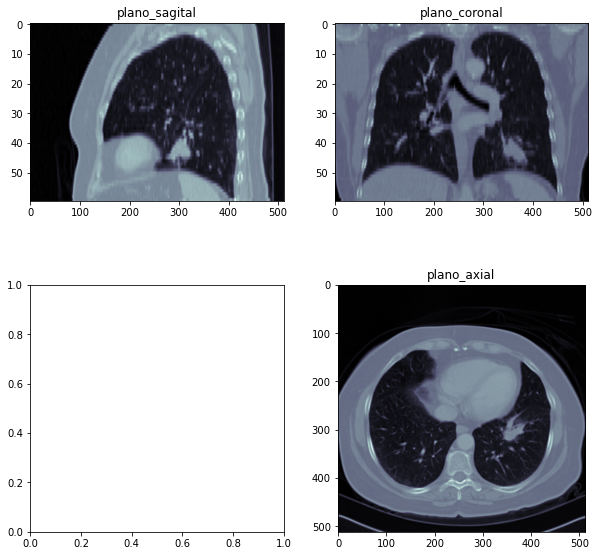

In [20]:
Tumor_coords=(304, 355, 44) 

tumor_axial = TENSOR_LUNG[Tumor_coords[2], :, :]
tumor_coronal = (TENSOR_LUNG[:, Tumor_coords[0], :])
tumor_sagital = (TENSOR_LUNG[:, :, Tumor_coords[1]])


fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(tumor_sagital, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[1])
axs[0,1].imshow(tumor_coronal, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[2])
axs[1,1].imshow(tumor_axial, cmap=plt.cm.get_cmap('bone'))

axs[0,0].set_title("plano_sagital")
axs[0,1].set_title("plano_coronal")
axs[1,1].set_title("plano_axial");

In [30]:
Tumor_coords=(304, 355, 44) 

tumor_axial = (TENSOR_LUNG[Tumor_coords[2], :, :])
tumor_coronal = (TENSOR_LUNG[:, Tumor_coords[0], :])
tumor_sagital = (TENSOR_LUNG[:, :, Tumor_coords[1]])

axial_test = 0*np.ones((tumor_axial.shape[0],tumor_axial.shape[1],3),dtype=np.uint8)
coronal_test= 0*np.ones((tumor_coronal.shape[0],tumor_coronal.shape[1],3),dtype=np.uint8)
sagital_test= 0*np.ones((tumor_sagital.shape[0],tumor_sagital.shape[1],3),dtype=np.uint8)

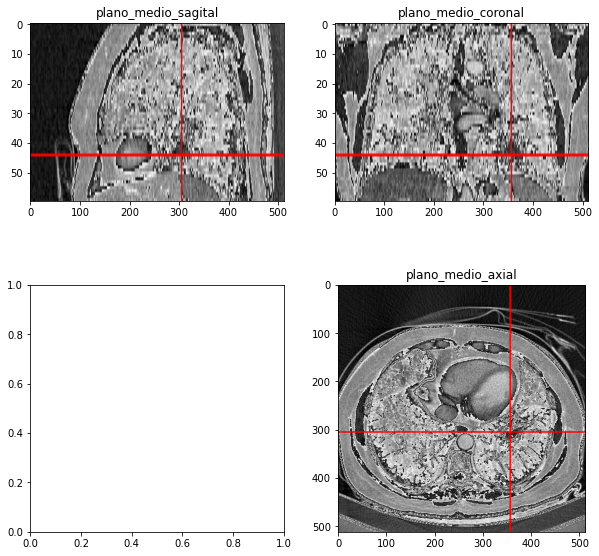

In [31]:
for i in range(3):
    axial_test[:,:,i] = tumor_axial
    coronal_test[:,:,i] = tumor_coronal
    sagital_test[:,:,i] = tumor_sagital

axial_paint = np.copy(axial_test)
coronal_paint = np.copy(coronal_test)
sagital_paint = np.copy(sagital_test)

axial_paint = cv2.line(axial_paint, (355, 0), (355, axial_paint.shape[1]), (255,0,0), 2)
axial_paint = cv2.line(axial_paint, (0, 305), (axial_paint.shape[1], 305), (255,0,0), 2)

coronal_paint = cv2.line(coronal_paint, (355, 0), (355, coronal_paint.shape[1]), (255,0,0), 2)
coronal_paint = cv2.line(coronal_paint, (0, 44), (coronal_paint.shape[1], 44), (255,0,0), 1)

sagital_paint = cv2.line(sagital_paint, (305, 0), (305, sagital_paint.shape[1]), (255,0,0), 2)
sagital_paint = cv2.line(sagital_paint, (0, 44), (sagital_paint.shape[1], 44), (255,0,0), 1)  

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(sagital_paint, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[1])
axs[0,1].imshow(coronal_paint, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[2])
axs[1,1].imshow(axial_paint, cmap=plt.cm.get_cmap('bone'))

axs[0,0].set_title("plano_medio_sagital")
axs[0,1].set_title("plano_medio_coronal")
axs[1,1].set_title("plano_medio_axial");

## – cambiar el ajuste de contraste (windowing)

### modificar imatge d'on es llegeix


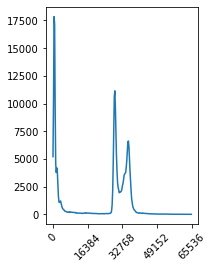

In [33]:
histogram = cv2.calcHist([tumor_img.astype('float32')], [0], mask=None, histSize=[256], ranges=[0, 2**11])
plt.subplot(122), plt.plot(histogram), plt.xticks(np.arange(0, 2**8+1, step=2**6), np.arange(0, 2**16+1, step=2**14), rotation=45)
plt.show()

In [34]:
type(tumor_img)

numpy.ndarray

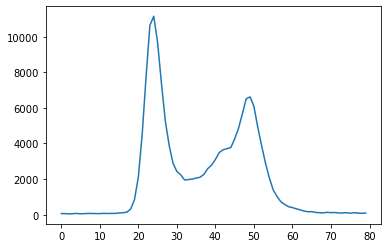

In [38]:
#ES MOSTRA LA REGIÓ ON ES CONDENSEN LES DADES
plt.plot(histogram[90:170]);

No s'ha pogut extreure les dades que comprenen aquesta regió.

# ---------------------------------

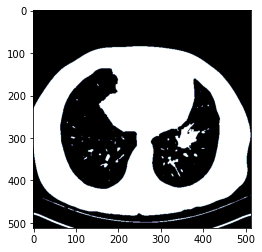

In [40]:
tumor_img_2 = TENSOR_LUNG[44, :, :]
threshold = 500 # Medido en [T1]   
image_threshold_2 = tumor_img_2 > threshold 
plt.imshow(image_threshold_2,cmap=plt.cm.get_cmap('bone'));

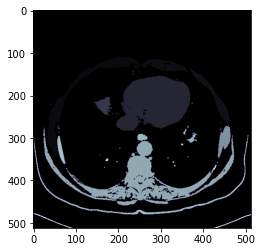

In [43]:
mask_bone = tumor_axial > 1000 #threshold per a segmentar els ossos
mask_bone_labels = measure.label(mask_bone) #labels que destaquen els diferents ossos 

plt.imshow(mask_bone_labels,cmap=plt.cm.get_cmap('bone'));#

#tumor_coronal
#tumor_sagital

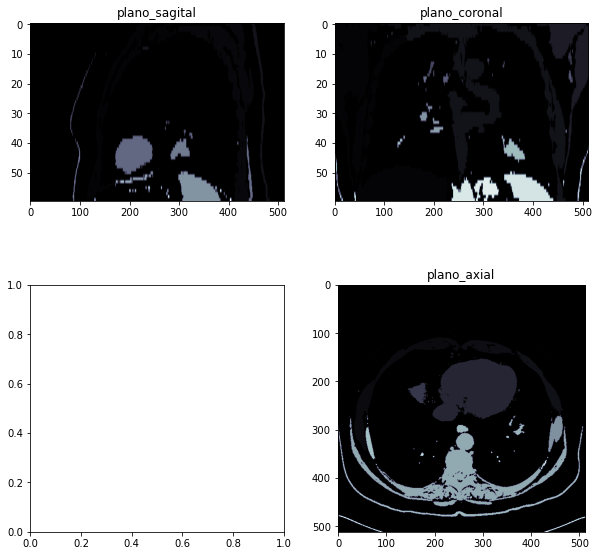

In [42]:
#threshold per a segmentar les zones blanes
axial_mask = tumor_axial > 1000 
coronal_mask = tumor_coronal > 1000
sagital_mask = tumor_sagital > 1000

#labels que destaquen les diferents zones
mask_bone_sagital = measure.label(sagital_mask) 
mask_bone_coronal = measure.label(coronal_mask) 
mask_bone_axial = measure.label(axial_mask) 


fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(mask_bone_sagital, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[1])
axs[0,1].imshow(mask_bone_coronal, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[2])
axs[1,1].imshow(mask_bone_axial, cmap=plt.cm.get_cmap('bone'))

axs[0,0].set_title("plano_sagital")
axs[0,1].set_title("plano_coronal")
axs[1,1].set_title("plano_axial");

sel·leccionar la franja de l'histograma on s'agrupen totes les dades

## – visualizar una subimagen (especificando un rango en cada una de las dimensiones)

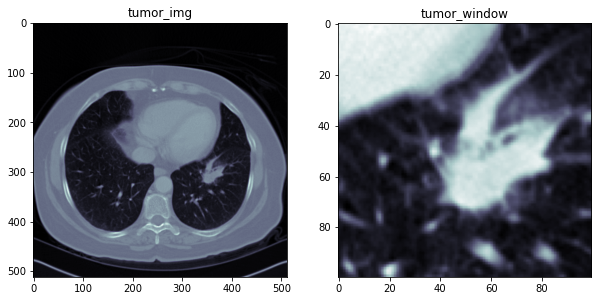

In [44]:
Tumor_coords=(304, 355, 44) 

tumor_axial = TENSOR_LUNG[Tumor_coords[2], :, :]

threshold = 500 # Medido en [T1] 
# setup initial location of window
x, y, w, h = 300, 250, 100, 100 # simply hardcoded the values to see the tumoral region. track_window = (x, y, w, h)


# set up the ROI for tracking
tumor_window = tumor_axial[y:y+h, x:x+w] 

fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].imshow(tumor_axial, cmap=plt.cm.get_cmap('bone'))
axs[1].imshow(tumor_window, cmap=plt.cm.get_cmap('bone'))

axs[0].set_title("tumor_img")
axs[1].set_title("tumor_window");

A continuació es mostra el mateix amb una imatge de tres canals

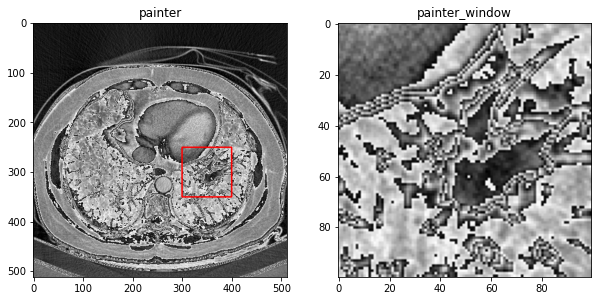

In [45]:
tumor_img = TENSOR_LUNG[44, :, :]

test = 0*np.ones((tumor_img.shape[0],tumor_img.shape[1],3),dtype=np.uint8)
for i in range(3):
    test[:,:,i] = tumor_img

# set up the ROI for tracking
painter_window = test[y:y+h, x:x+w] 

painter = np.copy(test)
    
painter = cv2.rectangle(painter,(x,y),((x+w),(y+h)),(255,0,0),2)

fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].imshow(painter, cmap=plt.cm.get_cmap('bone'))
axs[1].imshow(painter_window, cmap=plt.cm.get_cmap('bone'))

axs[0].set_title("painter")
axs[1].set_title("painter_window");

## – visualizar una segmentacion superpuesta a la imagen DICOM.

In [46]:
def segmentar(tensor_slice):
    mask_bone = tensor_slice > 975 #threshold per a segmentar els ossos
    mask_bone_labels = measure.label(mask_bone) #labels que destaquen els diferents ossos 
    mask_bone_segmentation = plt.cm.get_cmap('prism')(mask_bone_labels) * mask_bone[..., np.newaxis]
    
    return mask_bone_segmentation

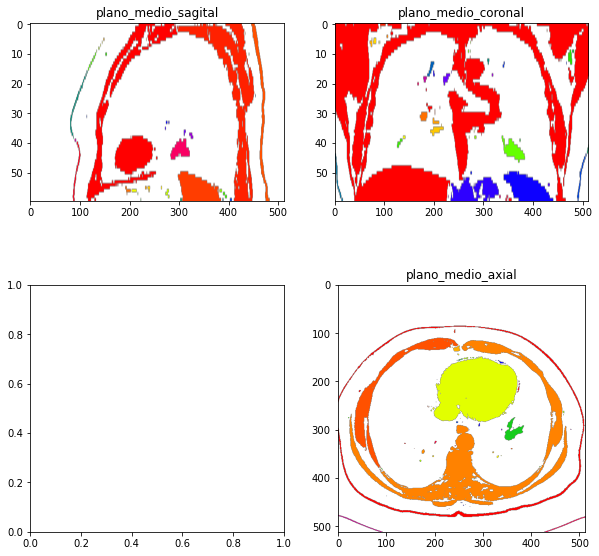

In [47]:
Tumor_coords=(304, 355, 44) 

tumor_axial = TENSOR_LUNG[Tumor_coords[2], :, :]
tumor_coronal = (TENSOR_LUNG[:, Tumor_coords[0], :])
tumor_sagital = (TENSOR_LUNG[:, :, Tumor_coords[1]])

image_threshold_axial = segmentar(tumor_axial)
image_threshold_coronal = segmentar(tumor_coronal)
image_threshold_sagital = segmentar(tumor_sagital)


fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(image_threshold_sagital, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[1])
axs[0,1].imshow(image_threshold_coronal, cmap=plt.cm.get_cmap('bone'), aspect=pixel_len_mm[0]/pixel_len_mm[2])
axs[1,1].imshow(image_threshold_axial, cmap=plt.cm.get_cmap('bone'))

axs[0,0].set_title("plano_medio_sagital")
axs[0,1].set_title("plano_medio_coronal")
axs[1,1].set_title("plano_medio_axial");

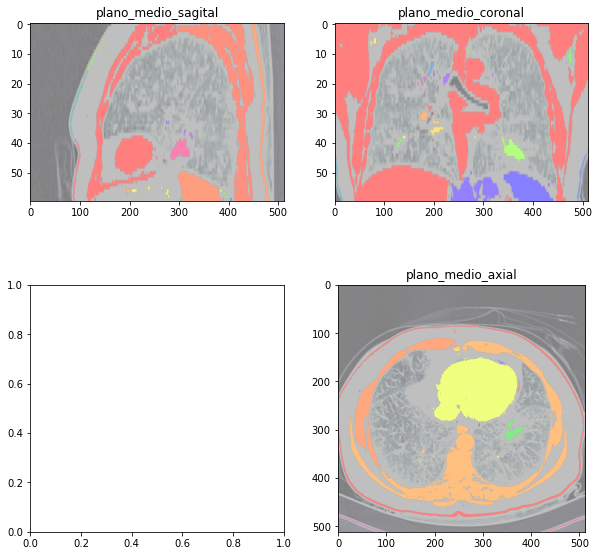

In [51]:
tumor_axial = (TENSOR_LUNG[Tumor_coords[2], :, :])
tumor_coronal = (TENSOR_LUNG[:, Tumor_coords[0], :])
tumor_sagital = (TENSOR_LUNG[:, :, Tumor_coords[1]])

tumor_axial_cmapped = plt.cm.get_cmap('bone')(tumor_axial) #pintem la imatges segons el mapa de colors 'bone'
tumor_coronal_cmapped = plt.cm.get_cmap('bone')(tumor_coronal) #pintem la imatges segons el mapa de colors 'bone'
tumor_sagital_cmapped = plt.cm.get_cmap('bone')(tumor_sagital) #pintem la imatges segons el mapa de colors 'bone'

tumor_axial_superpos = tumor_axial_cmapped * 0.50 + image_threshold_axial * 0.50
tumor_coronal_superpos = tumor_coronal_cmapped * 0.50 + image_threshold_coronal * 0.50
tumor_sagital_superpos = tumor_sagital_cmapped * 0.50 + image_threshold_sagital * 0.50

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(tumor_sagital_superpos, aspect=pixel_len_mm[0]/pixel_len_mm[1])
axs[0,1].imshow(tumor_coronal_superpos, aspect=pixel_len_mm[0]/pixel_len_mm[2])
axs[1,1].imshow(tumor_axial_superpos)

axs[0,0].set_title("plano_medio_sagital")
axs[0,1].set_title("plano_medio_coronal")
axs[1,1].set_title("plano_medio_axial");

# Segmentació

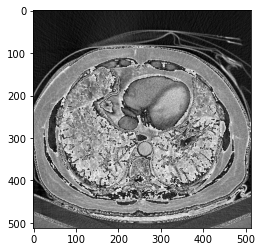

In [52]:
tumor_img = TENSOR_LUNG[44, :, :]

test = 0*np.ones((tumor_img.shape[0],tumor_img.shape[1],3),dtype=np.uint8)
for i in range(3):
    test[:,:,i] = tumor_img
    
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.imshow(test_gray, cmap = 'gray')

In [53]:
# Converting those pixels with values 1-127 to 0 and others to 1
img = cv2.threshold(test_gray, 80, 255, cv2.THRESH_BINARY_INV)[1]
# Applying cv2.connectedComponents() 
num_labels, labels = cv2.connectedComponents(img)

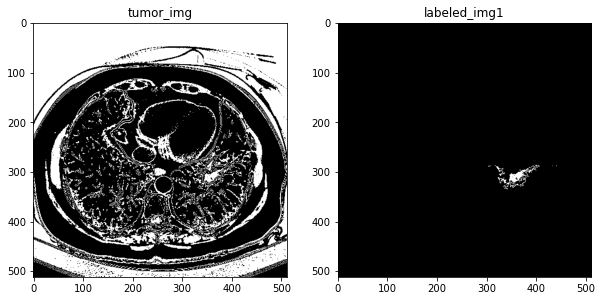

In [54]:
# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
big_image = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = big_image.copy()

# Convertim cvt a BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

labeled_img[label_hue != (67)] = 0
labeled_img[label_hue == (67)] = 255


fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow((labeled_img))

axs[0].set_title("tumor_img")
axs[1].set_title("labeled_img1");


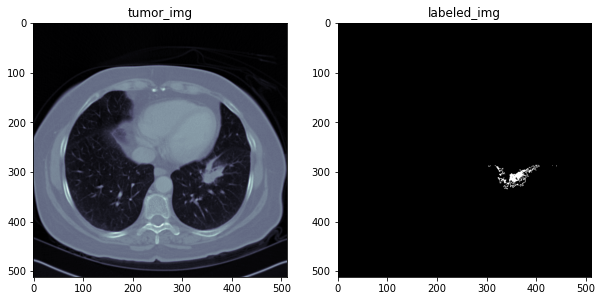

In [95]:
fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].imshow(tumor_axial, cmap=plt.cm.get_cmap('bone'))
axs[1].imshow(labeled_img)

axs[0].set_title("tumor_img")
axs[1].set_title("labeled_img");

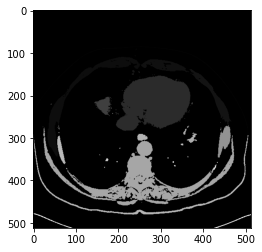

In [107]:
test_axis = 0*np.ones((mask_bone_axial.shape[0],mask_bone_axial.shape[1],3),dtype=np.uint8)
for i in range(3):
    test_axis[:,:,i] = mask_bone_axial
    
test_gray = cv2.cvtColor(test_axis, cv2.COLOR_BGR2GRAY)
    
plt.imshow(test_gray, cmap = 'gray')

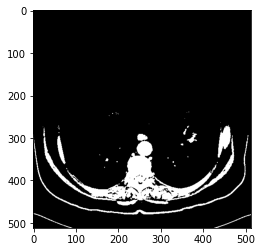

In [122]:
img = cv2.threshold(test_gray, 30, 255, cv2.THRESH_BINARY)[1]
# Applying cv2.connectedComponents() 
num_labels, labels = cv2.connectedComponents(img)
plt.imshow(img, cmap = 'gray')

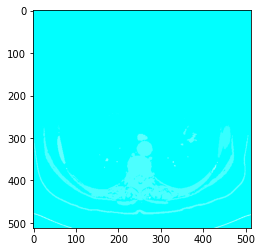

In [123]:
# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
big_image = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = big_image.copy()

plt.imshow(labeled_img)

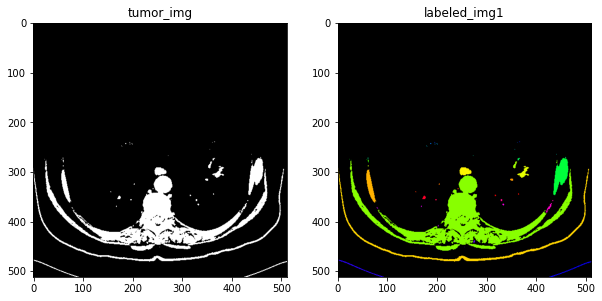

In [124]:
# Convertim cvt a BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

#labeled_img[label_hue != (12)] = 0
labeled_img[label_hue == (0)] = 0


fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow((labeled_img))

axs[0].set_title("tumor_img")
axs[1].set_title("labeled_img1");

In [117]:
labeled_img[300,373]

array([ 17, 255,   0], dtype=uint8)